## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
## 資料前處理
def preproc_x(x, flatten=True):
    x =x /255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 405us/step - loss: 1.9825 - acc: 0.2765 - val_loss: 1.8019 - val_acc: 0.3484
Epoch 2/100
50000/50000 [==============================] - 18s 366us/step - loss: 1.7448 - acc: 0.3699 - val_loss: 1.6966 - val_acc: 0.3928
Epoch 3/100
50000/50000 [==============================] - 19s 371us/step - loss: 1.6650 - acc: 0.4001 - val_loss: 1.6349 - val_acc: 0.4108
Epoch 4/100
50000/50000 [==============================] - 18s 356us/step - loss: 1.5961 - acc: 0.4286 - val_loss: 1.6148 - val_acc: 0.4256
Epoch 5/100
50000/50000 [==============================] - 18s 360us/step - loss: 1.5373 - acc: 0.4523 - val_loss: 1.5143 - val_acc: 0.4634
Epoch 6/100
50000/50000 [==============================] - 18s 358us/step - loss: 1.5004 - acc: 0.4626 - val_loss: 1.5424 - val_acc: 0.4478
Epoch 7/100
50000/50000 [==============================] - 18s 360us/step - loss: 1.4659 - acc: 0.4768 - val_l

Epoch 59/100
50000/50000 [==============================] - 18s 353us/step - loss: 0.5738 - acc: 0.7945 - val_loss: 1.9696 - val_acc: 0.5098
Epoch 60/100
50000/50000 [==============================] - 18s 354us/step - loss: 0.5637 - acc: 0.7967 - val_loss: 2.0157 - val_acc: 0.5160
Epoch 61/100
50000/50000 [==============================] - 18s 354us/step - loss: 0.5579 - acc: 0.8007 - val_loss: 2.0128 - val_acc: 0.5126
Epoch 62/100
50000/50000 [==============================] - 18s 356us/step - loss: 0.5433 - acc: 0.8056 - val_loss: 2.0885 - val_acc: 0.5127
Epoch 63/100
50000/50000 [==============================] - 18s 354us/step - loss: 0.5482 - acc: 0.8024 - val_loss: 2.1617 - val_acc: 0.5100
Epoch 64/100
50000/50000 [==============================] - 18s 354us/step - loss: 0.5337 - acc: 0.8075 - val_loss: 2.1119 - val_acc: 0.5107
Epoch 65/100
50000/50000 [==============================] - 18s 354us/step - loss: 0.5292 - acc: 0.8093 - val_loss: 2.1614 - val_acc: 0.5113
Epoch 66/100


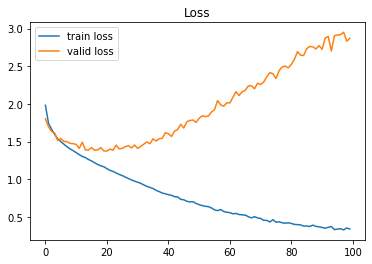

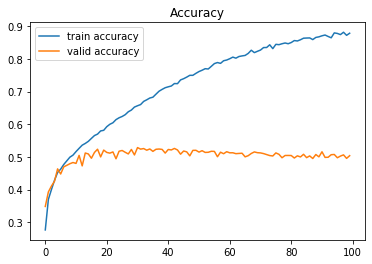

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()